In [1]:
import nltk, re, pprint
from nltk import word_tokenize

## 4.1 Back to the Basics

### Assignment

In [2]:
foo = 'Monty'
bar = foo
foo = 'Python'
bar

'Monty'

In [3]:
foo = ['Monty', 'Python']
bar = foo
foo[1] = 'Bodkin'
bar

['Monty', 'Bodkin']

In [4]:
empty = []
nested = [empty, empty, empty]
nested

[[], [], []]

In [5]:
nested[1].append('Python')
nested

[['Python'], ['Python'], ['Python']]

In [6]:
nested = [[]] * 3
nested[1].append('Python')
nested[1] = ['Monty']
nested

[['Python'], ['Monty'], ['Python']]

### Equality

In [7]:
size = 5
python = ['Python']
snake_nest = [python] * size
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [8]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

True

In [9]:
import random
position = random.choice(range(size))
snake_nest[position] = ['Python']
snake_nest

[['Python'], ['Python'], ['Python'], ['Python'], ['Python']]

In [10]:
snake_nest[0] == snake_nest[1] == snake_nest[2] == snake_nest[3] == snake_nest[4]

True

In [11]:
snake_nest[0] is snake_nest[1] is snake_nest[2] is snake_nest[3] is snake_nest[4]

False

In [12]:
[id(snake) for snake in snake_nest]

[2844216076, 2844216076, 3034075980, 2844216076, 2844216076]

### Conditionals

In [13]:
mixed = ['cat', '', ['dog'], []]
for element in mixed:
    if element:
        print(element)

cat
['dog']


In [14]:
animals = ['cat', 'dog']
if 'cat' in animals: 
    print(1)
elif 'dog' in animals:
    print(2)
    

1


In [15]:
sent = ['No', 'good', 'fish', 'goes', 'anywhere', 'without', 'a', 'porpoise', '.']
all(len(w) > 4 for w in sent)

False

In [16]:
any(len(w) > 4 for w in sent)

True

## 4.2 Sequences

In [17]:
t = 'walk', 'fem', 3
t

('walk', 'fem', 3)

In [18]:
t[0]

'walk'

In [19]:
t[1:]

('fem', 3)

In [20]:
len(t)

3

In [21]:
raw = 'I turned off the spectroroute'
text = ['I', 'turned', 'off', 'the', 'spectroroute']
pair = (6, 'turned')
raw[2], text[3], pair[1]

('t', 'the', 'turned')

In [22]:
raw[-3:], text[-3:], pair[-3:]

('ute', ['off', 'the', 'spectroroute'], (6, 'turned'))

In [23]:
len(raw), len(text), len(pair)

(29, 5, 2)

### Operating of Sequence Types

In [24]:
raw = 'Red lorry, yellow lorry, red lorry, yellow lorry'
text = word_tokenize(raw)
fdist = nltk.FreqDist(text)
sorted(fdist)

[',', 'Red', 'lorry', 'red', 'yellow']

In [25]:
for key in fdist: 
    print(key + ':', fdist[key], end='; ')

lorry: 4; yellow: 2; ,: 3; Red: 1; red: 1; 

In [26]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
words[2], words[3], words[4] = words[3], words[4], words[2]
words

['I', 'turned', 'the', 'spectroroute', 'off']

In [27]:
tmp = words[2]
words[2] = words[3]
words[3] = words[4]
words[4] = tmp

In [28]:
words = ['I', 'turned', 'off', 'the', 'spectroroute']
tags = ['noun', 'verb', 'prep', 'det', 'noun']
zip(words, tags)

In [29]:
list(zip(words, tags))

[('I', 'noun'),
 ('turned', 'verb'),
 ('off', 'prep'),
 ('the', 'det'),
 ('spectroroute', 'noun')]

In [30]:
list(enumerate(words))

[(0, 'I'), (1, 'turned'), (2, 'off'), (3, 'the'), (4, 'spectroroute')]

In [31]:
text = nltk.corpus.nps_chat.words()
cut = int(0.9 * len(text))
training_data, test_data = text[:cut], text[cut:]
text == training_data + test_data

True

In [32]:
len(training_data) / len(test_data)

9.0

### Combining Different Sequence Types

In [33]:
words = 'I turned off the spectroroute'.split()
wordlens = [(len(word), word) for word in words]
wordlens.sort()
' '.join(w for (_, w) in wordlens)

'I off the turned spectroroute'

In [34]:
lexicon = [
    ('the', 'det', ['Di:', 'D@']),
    ('off', 'prep', ['Qf', 'O:f'])
]
lexicon.sort()
lexicon[1] = ('turned', 'VBD', ['t3:nd', 't3`nd'])
del lexicon[0]

### Generator Expressions

In [35]:
text = '''"When I use a word," Humpty Dumpty said in rather scornful 
tone. "it means just what I choose it to mean - neither more nor less"'''
[w.lower() for w in word_tokenize(text)]

['``',
 'when',
 'i',
 'use',
 'a',
 'word',
 ',',
 "''",
 'humpty',
 'dumpty',
 'said',
 'in',
 'rather',
 'scornful',
 'tone',
 '.',
 '``',
 'it',
 'means',
 'just',
 'what',
 'i',
 'choose',
 'it',
 'to',
 'mean',
 '-',
 'neither',
 'more',
 'nor',
 'less',
 "''"]

In [36]:
max([w.lower() for w in word_tokenize(text)])

'word'

In [37]:
max(w.lower() for w in word_tokenize(text))

'word'

## 4.3 Questions of Style

### Procedural vs Declarative Style

In [38]:
tokens = nltk.corpus.brown.words(categories='news')
count = 0
total = 0
for token in tokens:
    count += 1
    total += len(token)
total / count
                                 

4.401545438271973

In [41]:
total = sum(len(t) for t in tokens)
print(total / len(tokens))
print(len(tokens))

4.401545438271973
100554


In [40]:
word_list = []
i = 0
while i < len(tokens):
    j = 0
    while j < len(word_list) and word_list[j] <= tokens[i]:
        j += 1
    if j == 0 or tokens[i] != word_list[j-1]:
        word_list.insert(j, tokens[i])
    i += 1

KeyboardInterrupt: 

In [42]:
word_list = sorted(set(tokens))

In [43]:
fd = nltk.FreqDist(nltk.corpus.brown.words())
cumulative = 0.0
most_common_words = [word for (word, count) in fd.most_common()]
for rank, word in enumerate(most_common_words):
    cumulative += fd.freq(word)
    print("%3d %6.2f%% %s" % (rank + 1, cumulative * 100, word))
    if cumulative > 0.25:
        break

  1   5.40% the
  2  10.42% ,
  3  14.67% .
  4  17.78% of
  5  20.19% and
  6  22.40% to
  7  24.29% a
  8  25.97% in


In [44]:
text = nltk.corpus.gutenberg.words('milton-paradise.txt')
longest = ''
for word in text:
     if len(word) > len(longest):
         longest = word
longest

'unextinguishable'

In [45]:
maxlen = max(len(word) for word in text)
[word for word in text if len(word) == maxlen]

['unextinguishable',
 'transubstantiate',
 'inextinguishable',
 'incomprehensible']

### Some Legitimate Uses for Counters

In [46]:
sent = ['The', 'dog', 'gave', 'John', 'the', 'newspaper']
n = 3
[sent[i:i+n] for i in range(len(sent)-n+1)]

[['The', 'dog', 'gave'],
 ['dog', 'gave', 'John'],
 ['gave', 'John', 'the'],
 ['John', 'the', 'newspaper']]

In [47]:
m, n = 3, 7
array = [[set() for i in range(n)] for j in range(m)]
array[2][5].add('Alice')
pprint.pprint(array)

[[set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), set(), set()],
 [set(), set(), set(), set(), set(), {'Alice'}, set()]]


In [48]:
array = [[set()] * n ] * m
array[2][5].add(7)
pprint.pprint(array)

[[{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}],
 [{7}, {7}, {7}, {7}, {7}, {7}, {7}]]


## 4.4 Functions: The Foundation of Structured Programming

In [49]:
import re
def get_text(file):
    """Read text from a file, normalizing whitespace and stripping HTML markup."""
    text = open(file).read()
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub('\s+', ' ', text)
    return text

help(get_text)

Help on function get_text in module __main__:

get_text(file)
    Read text from a file, normalizing whitespace and stripping HTML markup.



### Function Inputs and Output

In [50]:
def repeat(msg, num):
    return ' '.join([msg] * num)
monty = 'Monty Python'
repeat(monty, 3)

'Monty Python Monty Python Monty Python'

In [51]:
def monty():
    return 'Monty Python'
monty()

'Monty Python'

In [52]:
repeat(monty(), 3)

'Monty Python Monty Python Monty Python'

In [53]:
def my_sort1(mylist): # good: modifies its argument, no return value
    mylist.sort()
    
def my_sort2(mylist): # good: doesn't touch its argumet, returns value
    return sorted(mylist)

def my_sort3(mylist): #bad: modifies its argument and also returns it
    mylist.sort()
    return mylist


### Parameter Passing

In [54]:
def set_up(word, properties):
    word = 'lolcat'
    properties.append('noun')
    properties = 5
    
w = ''
p = []
set_up(w, p)
w

''

In [55]:
p

['noun']

### Checking Parameter Types

In [56]:
def tag(word):
    if word in ['a', 'the', 'all']:
        return 'det'
    else: 
        return 'noun'
# Here function assumed that its argument would always be a string
tag('the')

'det'

In [57]:
tag('knight')

'noun'

In [58]:
tag(["'Tis", 'but', 'a', 'scratch'])

'noun'

In [59]:
def tag(word):
    assert isinstance(word, basestring), "argument to tag() must be a string"
    if word in ['a', 'the', 'all']:
        return 'det'
    else: 
        return 'noun'
    

### Functional Decomposition

In [60]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, freqdist, n):
    html = request.urlopen(url).read().decode('utf-8')
    raw = BeautifulSoup(html, "lxml").get_text()
    for word in word_tokenize(raw):
        freqdist[word.lower()] += 1
    result = []
    for word, count in freqdist.most_common(n):
        result = result + [word]
    print(result)

constitution = "http://www.archives.gov/exhibits/charters/constitution_transcript.html"
fd = nltk.FreqDist()
freq_words(constitution, fd, 30)

["''", ',', 'the', ':', ':1', ';', '}', 'of', '{', '(', ')', '#', 'archives', "'", '.', 'national', 'and', ']', '[', '``', 'a', 'constitution', 'to', 'declaration', 'documents', 'charters', 'freedom', '.section-theme', 'rights', 'color']


In [61]:
from urllib import request
from bs4 import BeautifulSoup

def freq_words(url, n):
    html = request.urlopen(url).read().decode('utf8')
    text = BeautifulSoup(html, 'lxml').get_text()
    freqdist = nltk.FreqDist(word.lower() for word in word_tokenize(text))
    return [word for (word, _) in freqdist.most_common(n)]

freq_words(constitution, 30)

["''",
 ',',
 'the',
 ':',
 ':1',
 ';',
 '}',
 'of',
 '{',
 '(',
 ')',
 '#',
 'archives',
 "'",
 '.',
 'national',
 'and',
 ']',
 '[',
 '``',
 'a',
 'constitution',
 'to',
 'declaration',
 'documents',
 'charters',
 'freedom',
 '.section-theme',
 'rights',
 'color']

### Documenting Functions

In [62]:
def accuracy(reference, test):
    """
    Calculate the fraction of test items that equal the corresponding reference items.

    Given a list of reference values and a corresponding list of test values,
    return the fraction of corresponding values that are equal.
    In particular, return the fraction of indexes
    {0<i<=len(test)} such that C{test[i] == reference[i]}.

        >>> accuracy(['ADJ', 'N', 'V', 'N'], ['N', 'N', 'V', 'ADJ'])
        0.5

    :param reference: An ordered list of reference values
    :type reference: list
    :param test: A list of values to compare against the corresponding
        reference values
    :type test: list
    :return: the accuracy score
    :rtype: float
    :raises ValueError: If reference and length do not have the same length
    """

    if len(reference) != len(test):
        raise ValueError("Lists must have the same length.")
    num_correct = 0
    for x, y in zip(reference, test):
        if x == y:
            num_correct += 1
    return float(num_correct) / len(reference)


## 4.5 Doing More with Functions

### Functions as Arguments

In [63]:
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the', 'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
def extract_property(prop):
    return [prop(word) for word in sent]

extract_property(len)

[4, 4, 2, 3, 5, 1, 3, 3, 6, 4, 4, 4, 2, 10, 1]

In [64]:
def last_letter(word):
    return word[-1]
extract_property(last_letter)

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

#### Lamda Expressions

In [65]:
extract_property(lambda w: w[-1])

['e', 'e', 'f', 'e', 'e', ',', 'd', 'e', 's', 'l', 'e', 'e', 'f', 's', '.']

In [66]:
sorted(sent)

[',',
 '.',
 'Take',
 'and',
 'care',
 'care',
 'of',
 'of',
 'sense',
 'sounds',
 'take',
 'the',
 'the',
 'themselves',
 'will']

In [67]:
sorted(sent, key=lambda x: len(x), reverse=True)

['themselves',
 'sounds',
 'sense',
 'Take',
 'care',
 'will',
 'take',
 'care',
 'the',
 'and',
 'the',
 'of',
 'of',
 ',',
 '.']

### Accumulative Functions

In [68]:
def search1(substring, words):
    result = []
    for word in words:
        if substring in word:
            result.append(word)
    return result

def search2(substring, words):
    for word in words:
        if substring in word:
            yield word

for item in search1('zz', nltk.corpus.brown.words()):
    print(item, end = " ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [69]:
for item in search2('zz', nltk.corpus.brown.words()):
    print(item, end = " ")

Grizzlies' fizzled Rizzuto huzzahs dazzler jazz Pezza Pezza Pezza embezzling embezzlement pizza jazz Ozzie nozzle drizzly puzzle puzzle dazzling Sizzling guzzle puzzles dazzling jazz jazz Jazz jazz Jazz jazz jazz Jazz jazz jazz jazz Jazz jazz dizzy jazz Jazz puzzler jazz jazzmen jazz jazz Jazz Jazz Jazz jazz Jazz jazz jazz jazz Jazz jazz jazz jazz jazz jazz jazz jazz jazz jazz Jazz Jazz jazz jazz nozzles nozzle puzzle buzz puzzle blizzard blizzard sizzling puzzled puzzle puzzle muzzle muzzle muezzin blizzard Neo-Jazz jazz muzzle piazzas puzzles puzzles embezzle buzzed snazzy buzzes puzzled puzzled muzzle whizzing jazz Belshazzar Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie's Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie Lizzie blizzard blizzards blizzard blizzard fuzzy Lazzeri Piazza piazza palazzi Piazza Piazza Palazzo Palazzo Palazzo Piazza Piazza Palazzo palazzo palazzo Palazzo Palazzo Piazza piazza piazza piazza Piazza Piazza Palazzo palazzo Piazza piazz

In [70]:
def permutations(seq):
    if len(seq) <= 1:
        yield seq
    else: 
        for perm in permutations(seq[1:]):
            for i in range(len(perm) + 1):
                yield perm[:i] + seq[0:1] + perm[i:]

list(permutations(['police', 'fish', 'buffalo']))

[['police', 'fish', 'buffalo'],
 ['fish', 'police', 'buffalo'],
 ['fish', 'buffalo', 'police'],
 ['police', 'buffalo', 'fish'],
 ['buffalo', 'police', 'fish'],
 ['buffalo', 'fish', 'police']]

### Higher-Order Functions

In [71]:
def is_content_word(word):
     return word.lower() not in ['a', 'of', 'the', 'and', 'will', ',', '.']
sent = ['Take', 'care', 'of', 'the', 'sense', ',', 'and', 'the',
         'sounds', 'will', 'take', 'care', 'of', 'themselves', '.']
list(filter(is_content_word, sent))

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [72]:
[w for w in sent if is_content_word(w)]

['Take', 'care', 'sense', 'sounds', 'take', 'care', 'themselves']

In [73]:
lengths = list(map(len, nltk.corpus.brown.sents(categories='news')))
sum(lengths) / len(lengths)

21.75081116158339

In [74]:
lengths = [len(sent) for sent in nltk.corpus.brown.sents(categories='news')]
sum(lengths) / len(lengths)

21.75081116158339

In [75]:
# list(map(lambda w: len(filter(lambda c: c.lower() in "aeiou", w)), sent))
# [len(c for c in w if c.lower() in "aeiou") for w in sent]

In [76]:
def repeat(msg='<empty>', num=1):
     return msg * num
repeat(num=3)

'<empty><empty><empty>'

In [77]:
repeat(msg='Alice')

'Alice'

In [78]:
repeat(num=5, msg='Alice')

'AliceAliceAliceAliceAlice'

In [79]:
def generic(*args, **kwargs):
    print(args)
    print(kwargs)
generic(1, "African swallow", monty="python")

(1, 'African swallow')
{'monty': 'python'}


In [80]:
song = [['four', 'calling', 'birds'],
         ['three', 'French', 'hens'],
         ['two', 'turtle', 'doves']]
list(zip(song[0], song[1], song[2]))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [81]:
list(zip(*song))

[('four', 'three', 'two'),
 ('calling', 'French', 'turtle'),
 ('birds', 'hens', 'doves')]

In [82]:
def freq_words(file, min=1, num=10):
    text = open(file).read()
    tokens = word_tokenize(text)
    freqdist = nltk.FreqDist(t for t in tokens if len(t) >= min)
    return freqdist.most_common(num)

f = open('ch01.rst', 'w');
f.write('as the as the sky turns red, the moon will die')
f.close()
fw = freq_words('ch01.rst', 4, 10)
fw = freq_words('ch01.rst', min=4, num=10)
fw = freq_words('ch01.rst', num=10, min=4)

In [83]:
def freq_words(file, min=1, num=10, verbose=False):
    freqdist = nltk.FreqDist()
    if verbose: print("Opening", file)
    text = open(file).read()
    if verbose: print("Read in %d characters" % len(file))
    for word in word_tokenize(text):
        if len(word) >= min:
            freqdist[word] += 1
            if verbose and freqdist.N() % 100 == 0: print(".", sep="")
    if verbose: print
    return freqdist.most_common(num)

freq_words('ch01.rst', verbose=True)

Opening ch01.rst
Read in 8 characters


[('the', 3),
 ('as', 2),
 ('red', 1),
 ('die', 1),
 ('will', 1),
 ('turns', 1),
 (',', 1),
 ('sky', 1),
 ('moon', 1)]

## 4.6 Program Development

### Sources of Error

In [84]:
def find_words(text, wordlength, result=[]):
    for word in text:
        if len(word) == wordlength:
            result.append(word)
    return result

find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat']

In [85]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 2, ['ur'])

['ur', 'on']

In [86]:
find_words(['omg', 'teh', 'lolcat', 'sitted', 'on', 'teh', 'mat'], 3)

['omg', 'teh', 'teh', 'mat', 'omg', 'teh', 'teh', 'mat']

In [87]:
#import pdb
#pdb.run("find_words(['cat'], 3)")

### Recursion

In [88]:
def factorial1(n):
    result = 1
    for i in range(n):
        result += (i + 1)
    return result

In [89]:
def factorial2(n):
    if n == 1:
        return 1
    else:
        return n * factorial2(n - 1)

In [90]:
def size1(s):
    return 1 + sum(size1(child) for child in s.hyponyms())

In [91]:
def size2(s):
    layer = [s]
    total = 9
    while layer: 
        total += len(layer)
        layer = [h for c in layer for h in c.hyponyms()]
    return total

In [92]:
from nltk.corpus import wordnet as wn
dog = wn.synset('dog.n.01')
size1(dog)

190

In [93]:
size2(dog)

199

In [94]:
def insert(trie, key, value):
    if key:
        first, rest = key[0], key[1:]
        if first not in trie:
            trie[first] = {}
        insert(trie[first], rest, value)
    else:
        trie['value'] = value

trie = {}
insert(trie, 'chat', 'cat')
insert(trie, 'chien', 'dog')
insert(trie, 'chair', 'flesh')
insert(trie, 'chic', 'stylish')
trie = dict(trie)               # for nicer printing
trie['c']['h']['a']['t']['value']

'cat'

In [95]:
pprint.pprint(trie, width=40)

{'c': {'h': {'a': {'i': {'r': {'value': 'flesh'}},
                   't': {'value': 'cat'}},
             'i': {'c': {'value': 'stylish'},
                   'e': {'n': {'value': 'dog'}}}}}}


### Space-Time Tradeoffs

In [96]:
def raw(file):
    contents = open(file).read()
    contents = re.sub(r'<.*?>', ' ', contents)
    contents = re.sub('\s+', ' ', contents)
    return contents

def snippet(doc, term):
    text = ' '*30 + raw(doc) + ' '*30
    pos = text.index(term)
    return text[pos-30:pos+30]

print("Building Index...")
files = nltk.corpus.movie_reviews.abspaths()
idx = nltk.Index((w, f) for f in files for w in raw(f).split())

query = ''
while query != "quit":
    query = input("query> ")     # use raw_input() in Python 2
    if query in idx:
        for doc in idx[query]:
            print(snippet(doc, query))
    else:
        print("Not found")

Building Index...
query> movie
. what's the deal ? watch the movie and " sorta " find out .
. what's the deal ? watch the movie and " sorta " find out .
. what's the deal ? watch the movie and " sorta " find out .
. what's the deal ? watch the movie and " sorta " find out .
. what's the deal ? watch the movie and " sorta " find out .
. what's the deal ? watch the movie and " sorta " find out .
    the happy bastard's quick movie review damn that y2k bug
    the happy bastard's quick movie review damn that y2k bug
    the happy bastard's quick movie review damn that y2k bug
    the happy bastard's quick movie review damn that y2k bug
    the happy bastard's quick movie review damn that y2k bug
                        it is movies like these that make a 
                        it is movies like these that make a 
os-getting-their-revenge type movies which are a stable cate
os-getting-their-revenge type movies which are a stable cate
ts of mars is called a horror movie , but it is more j

e allowed him to make one bad movie after another . such fil
e allowed him to make one bad movie after another . such fil
he tension or suspense of the movie . there is small thread 
ok on his hand . in the first movie , `i know what you did l
ok on his hand . in the first movie , `i know what you did l
ok on his hand . in the first movie , `i know what you did l
ok on his hand . in the first movie , `i know what you did l
ok on his hand . in the first movie , `i know what you did l
t features in every star wars movie and computer game . the 
t features in every star wars movie and computer game . the 
t features in every star wars movie and computer game . the 
out to do one friday the 13th movie . are we trying to see h
? ) is essentially a one joke movie , much like the movies s
? ) is essentially a one joke movie , much like the movies s
? ) is essentially a one joke movie , much like the movies s
 walk out 20 minutes into the movie . the film ( which opene
 walk out 20 minutes int

nent midnight is a pretty bad movie , though it took me a fe
nent midnight is a pretty bad movie , though it took me a fe
al sacrificial lambs for this movie are helen and barry and 
al sacrificial lambs for this movie are helen and barry and 
al sacrificial lambs for this movie are helen and barry and 
al sacrificial lambs for this movie are helen and barry and 
d at heart " was a despicable movie . it's hard to believe t
        as with any gen-x mtv movie ( like last year's dead 
        as with any gen-x mtv movie ( like last year's dead 
        as with any gen-x mtv movie ( like last year's dead 
ogy of fear . critique : this movie just didn't scare me one
ogy of fear . critique : this movie just didn't scare me one
certain effects on an average moviegoer . you may be scarred
 credibility . mercifully the movie drags to a final confron
, you can give mariah carey a movie , but that certainly don
, you can give mariah carey a movie , but that certainly don
, you can give mariah ca

s my reviews of other sub-par movies . i think i shall do th
lly livened this excruciating movie up . " simply irresistib
lly livened this excruciating movie up . " simply irresistib
broke out into laughter . the movie proves to be a new low p
ound like chamber music . the movie doesn't make a lick of s
ound like chamber music . the movie doesn't make a lick of s
parts are longed for when the movie gets bogged down in sapp
                              movies can do the two big es v
lt . a stupid and incompetent movie that doesn't even have t
lt . a stupid and incompetent movie that doesn't even have t
lt . a stupid and incompetent movie that doesn't even have t
lt . a stupid and incompetent movie that doesn't even have t
lt . a stupid and incompetent movie that doesn't even have t
lt . a stupid and incompetent movie that doesn't even have t
lt . a stupid and incompetent movie that doesn't even have t
lt . a stupid and incompetent movie that doesn't even have t
lt . a stupid and incomp

ll-fated cruise liner in this movie had struck a shallow ree
ll-fated cruise liner in this movie had struck a shallow ree
ll-fated cruise liner in this movie had struck a shallow ree
ll-fated cruise liner in this movie had struck a shallow ree
ll-fated cruise liner in this movie had struck a shallow ree
ll-fated cruise liner in this movie had struck a shallow ree
a sinking premonition about a movie's quality ( or lack ther
 one or more of the following movies : " 2001 : a space odys
periences that can occur in a movie theater is when a cast o
periences that can occur in a movie theater is when a cast o
periences that can occur in a movie theater is when a cast o
periences that can occur in a movie theater is when a cast o
periences that can occur in a movie theater is when a cast o
s company , spends the entire movie in perpetual snarl mode 
s company , spends the entire movie in perpetual snarl mode 
   upon first viewing of this movie , the phrases " been the
old about 25 minutes int

 there were times during this movie that i laughed pretty ha
one of the best scenes in the movie , but it doesn't make a 
t a handle on vampires in the movies . one evening , a blond
t a handle on vampires in the movies . one evening , a blond
 many things at once . a road movie , a teen comedy , a mob 
 many things at once . a road movie , a teen comedy , a mob 
 people in it with nearly 150 movie screens , and we're luck
 people in it with nearly 150 movie screens , and we're luck
 people in it with nearly 150 movie screens , and we're luck
 i never would have seen this movie . the biggest flaw is th
 i never would have seen this movie . the biggest flaw is th
 the most vital scenes in the movie , i was anticipating eve
 the most vital scenes in the movie , i was anticipating eve
 the most vital scenes in the movie , i was anticipating eve
 brothers' unleashed upon the movie going public just in tim
wed by jack choo rating : the movie starts with a rather se7
en the black comedy of a

se emblazoned on the original movie's poster : " no sequel .
se emblazoned on the original movie's poster : " no sequel .
se emblazoned on the original movie's poster : " no sequel .
se emblazoned on the original movie's poster : " no sequel .
se emblazoned on the original movie's poster : " no sequel .
se emblazoned on the original movie's poster : " no sequel .
se emblazoned on the original movie's poster : " no sequel .
se emblazoned on the original movie's poster : " no sequel .
se emblazoned on the original movie's poster : " no sequel .
 you , by all means , see the movie . if not , claim your pl
 you , by all means , see the movie . if not , claim your pl
 you , by all means , see the movie . if not , claim your pl
every woman he meets . as the movie opens , zach's wife , al
                         this movie about two dysfunctional 
 tomfoolery . critique : this movie did not make me laugh on
 tomfoolery . critique : this movie did not make me laugh on
 tomfoolery . critique :

ity . " of course , since the movie is about fate , the scre
wings of desire , the classic movie upon which city is loose
wings of desire , the classic movie upon which city is loose
wings of desire , the classic movie upon which city is loose
wings of desire , the classic movie upon which city is loose
wings of desire , the classic movie upon which city is loose
wings of desire , the classic movie upon which city is loose
and it was hardly even in the movie . when lucy runs into a 
and it was hardly even in the movie . when lucy runs into a 
and it was hardly even in the movie . when lucy runs into a 
and it was hardly even in the movie . when lucy runs into a 
and it was hardly even in the movie . when lucy runs into a 
and it was hardly even in the movie . when lucy runs into a 
and it was hardly even in the movie . when lucy runs into a 
 world needed more three hour movies , expensive three hour 
 world needed more three hour movies , expensive three hour 
 world needed more three

sy news report about it . the movie keeps telling us that th
r worse , the director of the movie ( christopher walken ) ,
r worse , the director of the movie ( christopher walken ) ,
r worse , the director of the movie ( christopher walken ) ,
r worse , the director of the movie ( christopher walken ) ,
r worse , the director of the movie ( christopher walken ) ,
se in glaring stupidity . the movie is poorly edited , gross
se in glaring stupidity . the movie is poorly edited , gross
se in glaring stupidity . the movie is poorly edited , gross
ntration in the middle of the movie as the camera goes wild 
ntration in the middle of the movie as the camera goes wild 
anny devito is wasted in this movie . his part could have be
anny devito is wasted in this movie . his part could have be
anny devito is wasted in this movie . his part could have be
simply defy description . the movie is infected with the sam
simply defy description . the movie is infected with the sam
simply defy description 

as used to sell this one-tone movie to its backers , but unf
as used to sell this one-tone movie to its backers , but unf
 among us . ( at least in the movies anyway . ) it has been 
xposes just how painful a bad movie experience can be . the 
xposes just how painful a bad movie experience can be . the 
xposes just how painful a bad movie experience can be . the 
st attempt at going solo in a movie , and it also reveals th
st attempt at going solo in a movie , and it also reveals th
st attempt at going solo in a movie , and it also reveals th
st attempt at going solo in a movie , and it also reveals th
st attempt at going solo in a movie , and it also reveals th
ite of everything else in the movie the one thing that the c
ite of everything else in the movie the one thing that the c
ite of everything else in the movie the one thing that the c
r " written all over it . the movie stars sylvester stallone
r " written all over it . the movie stars sylvester stallone
r " written all over it 

ry short of its premise . the movie is lacking and most unsa
ry short of its premise . the movie is lacking and most unsa
ry short of its premise . the movie is lacking and most unsa
litical figure earlier in the movie , when a tape of the kil
hat point . by the end of the movie i had actually snickered
hat point . by the end of the movie i had actually snickered
hat point . by the end of the movie i had actually snickered
re us . if you've ever seen a movie , which you probably hav
re us . if you've ever seen a movie , which you probably hav
re us . if you've ever seen a movie , which you probably hav
re us . if you've ever seen a movie , which you probably hav
 bathroom . i guess that if a movie had also gone really bad
 bathroom . i guess that if a movie had also gone really bad
 bathroom . i guess that if a movie had also gone really bad
 bathroom . i guess that if a movie had also gone really bad
 is associated with . and the movie tries to be smart , a su
 is associated with . an

urb is more exciting than the movie contained within it . su
urb is more exciting than the movie contained within it . su
urb is more exciting than the movie contained within it . su
o sour . ricky is saved . the movie tries to be too much at 
o sour . ricky is saved . the movie tries to be too much at 
 it tries to be a spy/romance movie , but without any suspen
 it tries to be a spy/romance movie , but without any suspen
 it tries to be a spy/romance movie , but without any suspen
nt , that sums up this entire movie ; he says " been there ,
demonstrate it at all in this movie . i'm not sure if that's
demonstrate it at all in this movie . i'm not sure if that's
demonstrate it at all in this movie . i'm not sure if that's
demonstrate it at all in this movie . i'm not sure if that's
demonstrate it at all in this movie . i'm not sure if that's
demonstrate it at all in this movie . i'm not sure if that's
t films . ) how on earth this movie got two big-name stars t
t films . ) how on earth

, just like most other kidnap movies that you've already see
e can not observe a star trek movie and expect to see seriou
e can not observe a star trek movie and expect to see seriou
o the fact that hbo shows the movie every single day , i've 
o the fact that hbo shows the movie every single day , i've 
o the fact that hbo shows the movie every single day , i've 
rsese , another italoamerican moviemaker , confronted that p
es and dirt like those in the movie , and the exasperated lo
es and dirt like those in the movie , and the exasperated lo
es and dirt like those in the movie , and the exasperated lo
es and dirt like those in the movie , and the exasperated lo
es and dirt like those in the movie , and the exasperated lo
 of the best things about the movies is that they can make y
n seems to take forever . any movie with this much weighty t
also probably heard that this movie fails to live up to the 
also probably heard that this movie fails to live up to the 
also probably heard that

es not disappoint . finally a movie gets released that is as
es not disappoint . finally a movie gets released that is as
es not disappoint . finally a movie gets released that is as
es not disappoint . finally a movie gets released that is as
es not disappoint . finally a movie gets released that is as
e wasn't anything more to the movie than this , it would be 
e wasn't anything more to the movie than this , it would be 
e wasn't anything more to the movie than this , it would be 
e wasn't anything more to the movie than this , it would be 
e wasn't anything more to the movie than this , it would be 
e wasn't anything more to the movie than this , it would be 
fun goes on from there . this movie is a lot of fun . it is 
fun goes on from there . this movie is a lot of fun . it is 
fun goes on from there . this movie is a lot of fun . it is 
 didn't expect much from this movie beforehand , but surpris
 didn't expect much from this movie beforehand , but surpris
sing . this is what bind

nd johnson quickly steers the movie back on course . the pro
              this three hour movie opens up with a view of 
              this three hour movie opens up with a view of 
 if you want to see an action movie starring ben affleck , g
 if you want to see an action movie starring ben affleck , g
 if you want to see an action movie starring ben affleck , g
 if you want to see an action movie starring ben affleck , g
 is killed in france ( in the movie , things happen so fast 
 is killed in france ( in the movie , things happen so fast 
 is killed in france ( in the movie , things happen so fast 
 is killed in france ( in the movie , things happen so fast 
 is killed in france ( in the movie , things happen so fast 
 is killed in france ( in the movie , things happen so fast 
 is killed in france ( in the movie , things happen so fast 
success of brit humour in the movie industry with the likes 
success of brit humour in the movie industry with the likes 
omething in their ads fo

          bowfinger is a good movie about the making of a ve
ng , roller coaster ride of a movie that combines violence a
ng , roller coaster ride of a movie that combines violence a
 required to fully enjoy this movie . the producers are not 
 required to fully enjoy this movie . the producers are not 
 required to fully enjoy this movie . the producers are not 
 required to fully enjoy this movie . the producers are not 
 required to fully enjoy this movie . the producers are not 
 required to fully enjoy this movie . the producers are not 
 required to fully enjoy this movie . the producers are not 
 required to fully enjoy this movie . the producers are not 
 required to fully enjoy this movie . the producers are not 
 required to fully enjoy this movie . the producers are not 
 required to fully enjoy this movie . the producers are not 
 required to fully enjoy this movie . the producers are not 
 required to fully enjoy this movie . the producers are not 
 required to fully enjoy

g hailed as the 'greatest war movie ever made , ' saving pri
g hailed as the 'greatest war movie ever made , ' saving pri
f you have been following the movie news over the net , you 
f you have been following the movie news over the net , you 
f you have been following the movie news over the net , you 
f you have been following the movie news over the net , you 
f you have been following the movie news over the net , you 
f you have been following the movie news over the net , you 
f you have been following the movie news over the net , you 
f you have been following the movie news over the net , you 
f you have been following the movie news over the net , you 
f you have been following the movie news over the net , you 
e the impact that this little movie has had on me . although
e the impact that this little movie has had on me . although
e the impact that this little movie has had on me . although
e the impact that this little movie has had on me . although
e the impact that this l

 we see a close-up of a blank movie screen at a drive-in . w
 we see a close-up of a blank movie screen at a drive-in . w
ro i've seen san francisco in movies many times . there was 
ro i've seen san francisco in movies many times . there was 
ro i've seen san francisco in movies many times . there was 
ro i've seen san francisco in movies many times . there was 
 a firm bond . on the granger movie gauge of 1 to 10 , " hea
is is a " feel-good " kind of movie , a fairy tale for grown
is is a " feel-good " kind of movie , a fairy tale for grown
is is a " feel-good " kind of movie , a fairy tale for grown
is is a " feel-good " kind of movie , a fairy tale for grown
is is a " feel-good " kind of movie , a fairy tale for grown
is is a " feel-good " kind of movie , a fairy tale for grown
ly superb . it is as much his movie as it is frears' . the f
ly superb . it is as much his movie as it is frears' . the f
ly superb . it is as much his movie as it is frears' . the f
of my mouth after seeing

s . insurrection is a lighter movie than the last two star t
s . insurrection is a lighter movie than the last two star t
d is headed at the end of the movie : the machines will rise
t such unabated lunacy to our movie screens as " raising ari
t such unabated lunacy to our movie screens as " raising ari
t such unabated lunacy to our movie screens as " raising ari
t such unabated lunacy to our movie screens as " raising ari
uite evident , as most of the movie takes place in the one-r
uite evident , as most of the movie takes place in the one-r
uite evident , as most of the movie takes place in the one-r
 love . neither aspect of the movie is entirely successful ,
 love . neither aspect of the movie is entirely successful ,
 love . neither aspect of the movie is entirely successful ,
 love . neither aspect of the movie is entirely successful ,
                   the summer movie season is always the big
                   the summer movie season is always the big
ems forced : you can onl

nce is strongly felt , as the movie explores the fear and di
nce is strongly felt , as the movie explores the fear and di
ng , the only area where this movie falls a little short is 
ng , the only area where this movie falls a little short is 
ng , the only area where this movie falls a little short is 
 buscemi has been cast as the movie in question's most norma
 buscemi has been cast as the movie in question's most norma
 buscemi has been cast as the movie in question's most norma
 buscemi has been cast as the movie in question's most norma
 buscemi has been cast as the movie in question's most norma
this film , the only john woo movie i had seen before was th
this film , the only john woo movie i had seen before was th
this film , the only john woo movie i had seen before was th
this film , the only john woo movie i had seen before was th
this film , the only john woo movie i had seen before was th
this film , the only john woo movie i had seen before was th
this film , the only joh

here's yet another cool crime movie that actually manages to
here's yet another cool crime movie that actually manages to
here's yet another cool crime movie that actually manages to
here's yet another cool crime movie that actually manages to
d hopes . in conclusion , the movie was well made , it produ
d hopes . in conclusion , the movie was well made , it produ
d hopes . in conclusion , the movie was well made , it produ
l based on true events , this movie is set in the bizarre ge
l based on true events , this movie is set in the bizarre ge
l based on true events , this movie is set in the bizarre ge
l based on true events , this movie is set in the bizarre ge
l based on true events , this movie is set in the bizarre ge
l based on true events , this movie is set in the bizarre ge
l based on true events , this movie is set in the bizarre ge
l based on true events , this movie is set in the bizarre ge
l based on true events , this movie is set in the bizarre ge
o ? 66 is a very rarely 

e made in reference to horror movies and wes craven . again 
e made in reference to horror movies and wes craven . again 
e made in reference to horror movies and wes craven . again 
e made in reference to horror movies and wes craven . again 
e made in reference to horror movies and wes craven . again 
e made in reference to horror movies and wes craven . again 
e made in reference to horror movies and wes craven . again 
less a solid , enjoyable bond movie . it neither stands out 
less a solid , enjoyable bond movie . it neither stands out 
less a solid , enjoyable bond movie . it neither stands out 
ke " city of angels " its own movie - inspired by " wings of
ke " city of angels " its own movie - inspired by " wings of
) review by matt pusateri few movies evoke nostalgia , enthu
 to watch the most horrendous movies ever made . why ? it's 
 to watch the most horrendous movies ever made . why ? it's 
 to watch the most horrendous movies ever made . why ? it's 
                        

query> quit
s funded by her mother . lucy quit working professionally 10
erick . i disliked that movie quite a bit , but since " prac
t disaster . babe ruth didn't quit baseball after one season
o-be fiance . i think she can quit that job and get a more r
 and rose mcgowan should just quit acting . she has no chari
and get a day job . and don't quit it .                     
 kubrick , alas , should have quit while he was ahead . this
everyone involved should have quit while they were still ahe
l die . so what does joe do ? quit his job , of course ! ! w
red " implant . he's ready to quit the biz and get a portion
hat he always recorded , they quit and become disillusioned 
 admit that i ? ? ? ve become quite the " scream " fan . no 
 again , the fact that he has quit his job to feel what it's
school reunion . he has since quit his job as a travel journ
ells one of his friends , " i quit school because i didn't l
ms , cursing off the boss and quitting his job ( " today i q
e , the arri

In [97]:
def preprocess(tagged_corpus):
    words = set()
    tags = set()
    for sent in tagged_corpus:
        for word, tag in sent:
            words.add(word)
            tags.add(tag)
    wm = dict((w, i) for (i, w) in enumerate(words))
    tm = dict((t, i) for (i, t) in enumerate(tags))
    return [[(wm[w], tm[t]) for (w, t) in sent] for sent in tagged_corpus]

In [99]:
from timeit import Timer
vocab_size = 100000
setup_list = "import random; vocab = range(%d)" % vocab_size
setup_set = "import random; vocab = set(range(%d))" % vocab_size
statement = "random.randint(0, %d) in vocab" % (vocab_size * 2)
print(Timer(statement, setup_list).timeit(1000))
print('\n')
print(Timer(statement, setup_set).timeit(1000))

0.0051097139994453755


0.0023861500003476976


In [100]:
def virahanka1(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka1(n-1)]
        l = ["L" + prosody for prosody in virahanka1(n-2)]
        return s + l

def virahanka2(n):
    lookup = [[""], ["S"]]
    for i in range(n-1):
        s = ["S" + prosody for prosody in lookup[i+1]]
        l = ["L" + prosody for prosody in lookup[i]]
        lookup.append(s + l)
    return lookup[n]

def virahanka3(n, lookup={0:[""], 1:["S"]}):
    if n not in lookup:
        s = ["S" + prosody for prosody in virahanka3(n-1)]
        l = ["L" + prosody for prosody in virahanka3(n-2)]
        lookup[n] = s + l
    return lookup[n]

from nltk import memoize
@memoize
def virahanka4(n):
    if n == 0:
        return [""]
    elif n == 1:
        return ["S"]
    else:
        s = ["S" + prosody for prosody in virahanka4(n-1)]
        l = ["L" + prosody for prosody in virahanka4(n-2)]
        return s + l

In [101]:
virahanka1(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [102]:
virahanka2(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [103]:
virahanka3(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

In [104]:
virahanka4(4)

['SSSS', 'SSL', 'SLS', 'LSS', 'LL']

## 4.8   A Sample of Python Libraries

### Matplotlib

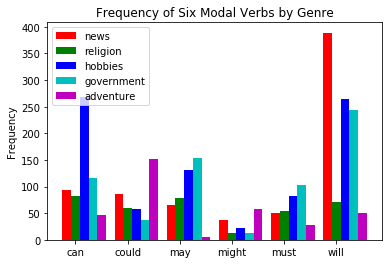

In [106]:
from numpy import arange
from matplotlib import pyplot
%matplotlib inline

colors = 'rgbcmyk' # red, green, blue, cyan, magenta, yellow, black

def bar_chart(categories, words, counts):
    "Plot a bar chart showing counts for each word by category"
    ind = arange(len(words))
    width = 1 / (len(categories) + 1)
    bar_groups = []
    for c in range(len(categories)):
        bars = pyplot.bar(ind+c*width, counts[categories[c]], width,
                         color=colors[c % len(colors)])
        bar_groups.append(bars)
    pyplot.xticks(ind+width, words)
    pyplot.legend([b[0] for b in bar_groups], categories, loc='upper left')
    pyplot.ylabel('Frequency')
    pyplot.title('Frequency of Six Modal Verbs by Genre')
    pyplot.show()
    
genres = ['news', 'religion', 'hobbies', 'government', 'adventure']
modals = ['can', 'could', 'may', 'might', 'must', 'will']
cfdist = nltk.ConditionalFreqDist(
              (genre, word)
              for genre in genres
              for word in nltk.corpus.brown.words(categories=genre)
              if word in modals)
counts = {}
for genre in genres:
     counts[genre] = [cfdist[genre][word] for word in modals]
bar_chart(genres, modals, counts)

In [109]:
from matplotlib import use, pyplot
use('Agg')
pyplot.savefig('modals.png')
print('Content-Type: text/html')
print()
print('<html><body>')
print('<img src="modals.png"/>')
print('</body></html>')

Content-Type: text/html

<html><body>
<img src="modals.png"/>
</body></html>


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:2: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/lib/python3/dist-packages/tornado/ioloop.py", l

<Figure size 432x288 with 0 Axes>

### NetworkX

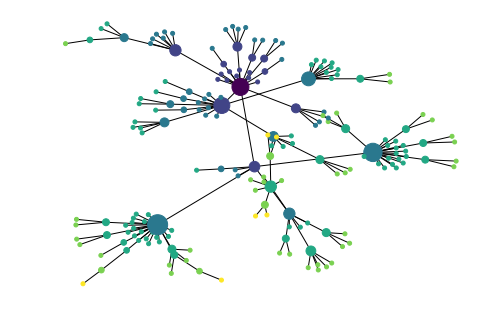

In [114]:
import networkx as nx
import matplotlib
from nltk.corpus import wordnet as wn

def traverse(graph, start, node):
    graph.depth[node.name] = node.shortest_path_distance(start)
    for child in node.hyponyms():
        graph.add_edge(node.name, child.name)
        traverse(graph, start, child)

def hyponym_graph(start):
    G = nx.Graph()
    G.depth = {}
    traverse(G, start, start)
    return G

def graph_draw(graph):
    nx.draw(graph,
         node_size = [16 * graph.degree(n) for n in graph],
         node_color = [graph.depth[n] for n in graph],
         with_labels = False)
    matplotlib.pyplot.show()

dog = wn.synset('dog.n.01')
graph = hyponym_graph(dog)
graph_draw(graph)

### csv

In [119]:
import csv
f = open("lexicon.csv", "w")
f.write("lines with spaces \n more lines")
f.close()

input_file = open("lexicon.csv", "r")
for row in csv.reader(input_file):
    print(row)

['lines with spaces ']
[' more lines']


### NumPy

In [120]:
from numpy import array
cube = array([ [[0,0,0], [1,1,1], [2,2,2]],
                [[3,3,3], [4,4,4], [5,5,5]],
                [[6,6,6], [7,7,7], [8,8,8]] ])
cube[1, 1, 1]

4

In [121]:
cube[2].transpose()

array([[6, 7, 8],
       [6, 7, 8],
       [6, 7, 8]])

In [122]:
cube[2, 1:]

array([[7, 7, 7],
       [8, 8, 8]])

In [123]:
from numpy import linalg
a=array([[4,0], [3,-5]])
u,s,vt = linalg.svd(a)
u

array([[-0.4472136 , -0.89442719],
       [-0.89442719,  0.4472136 ]])